<h1 align='center'>Time Series Data Processing in Pandas</h1>

In [1]:
%pylab inline
pylab.style.use('ggplot')
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load the yahoo finance data for a bunch of stocks
import pandas_datareader as web

tickers = ['AAPL', 'IBM', 'MSFT', 'GOOGL']
daily_data = {ticker: web.get_data_yahoo(ticker, '1/1/2013', '12/31/2016') for ticker in tickers}

In [3]:
# Do we have duplicate dates?
for ticker in tickers:
    print(ticker, daily_data[ticker].index.has_duplicates)    

AAPL False
IBM False
MSFT False
GOOGL False


In [4]:
# Are number of observations same for all tickers?
for ticker in tickers:
    print(ticker, daily_data[ticker].shape)    

AAPL (1008, 6)
IBM (1008, 6)
MSFT (1008, 6)
GOOGL (1008, 6)


In [5]:
# Get the APPL dataset
aapl = daily_data['AAPL']
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2013-01-02 to 2016-12-30
Data columns (total 6 columns):
Open         1008 non-null float64
High         1008 non-null float64
Low          1008 non-null float64
Close        1008 non-null float64
Volume       1008 non-null int64
Adj Close    1008 non-null float64
dtypes: float64(5), int64(1)
memory usage: 55.1 KB


In [6]:
# Is it sorted by date?
print(aapl.index.is_monotonic)
print(aapl.index.is_monotonic_increasing)

True
True


In [7]:
# Resample to business day
print(aapl.index.freq)

# This will introduce nans because some business days are missing at source
aapl = aapl.asfreq('B')

None


In [8]:
aapl.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,553.819992,554.999992,541.630020,549.029976,140129500.0,71.763763
2013-01-03,547.879990,549.669991,540.999992,542.099991,88241300.0,70.857944
2013-01-04,536.969994,538.630005,525.829979,526.999992,148583400.0,68.884221
2013-01-07,521.999985,529.300018,515.199989,523.900002,121039100.0,68.479021
2013-01-08,529.209976,531.889984,521.250008,525.310020,114676800.0,68.663325


In [9]:
aapl.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-26,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-27,116.519997,117.800003,116.489998,117.260002,18296900.0,116.753806
2016-12-28,117.519997,118.019997,116.199997,116.760002,20905900.0,116.255965
2016-12-29,116.449997,117.110001,116.400002,116.730003,15039500.0,116.226096
2016-12-30,116.650002,117.199997,115.430000,115.820000,30586300.0,115.320020


In [10]:
# take the open price
aapl_open = aapl['Open']

In [11]:
# Do we have nans?
aapl_open[aapl_open.isnull()].shape

(35,)

In [31]:
# What are those days?
nan_days = aapl_open[aapl_open.isnull()].index
nan_days.weekday_name

array(['Monday', 'Monday', 'Friday', 'Monday', 'Thursday', 'Monday',
       'Thursday', 'Wednesday', 'Wednesday', 'Monday', 'Monday', 'Friday',
       'Monday', 'Friday', 'Monday', 'Thursday', 'Thursday', 'Thursday',
       'Monday', 'Monday', 'Friday', 'Monday', 'Friday', 'Monday',
       'Thursday', 'Friday', 'Friday', 'Monday', 'Monday', 'Friday',
       'Monday', 'Monday', 'Monday', 'Thursday', 'Monday'], dtype=object)

In [13]:
# Remove the nan values
valid_aapl_open = aapl_open[aapl_open.notnull()]

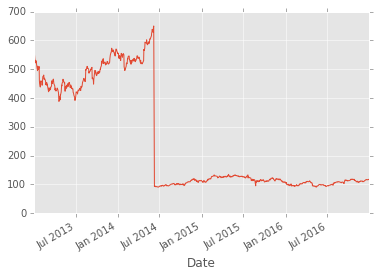

In [14]:
# Straight up plot
valid_aapl_open.plot()

In [15]:
# only for 2016
valid_aapl_open.truncate(before='2016-1-1').head()

Date
2016-01-04    102.610001
2016-01-05    105.750000
2016-01-06    100.559998
2016-01-07     98.680000
2016-01-08     98.550003
Name: Open, dtype: float64

In [16]:
# only for 2016
valid_aapl_open[valid_aapl_open.index.year==2016].head()

Date
2016-01-04    102.610001
2016-01-05    105.750000
2016-01-06    100.559998
2016-01-07     98.680000
2016-01-08     98.550003
Name: Open, dtype: float64

In [17]:
# Between June 2015 and June 2016
v = valid_aapl_open.truncate(before='2015-6', after='2016-6-30')
print(v.head())
print(v.tail())

Date
2015-06-01    130.279999
2015-06-02    129.860001
2015-06-03    130.660004
2015-06-04    129.580002
2015-06-05    129.500000
Name: Open, dtype: float64
Date
2016-06-24    92.910004
2016-06-27    93.000000
2016-06-28    92.900002
2016-06-29    93.970001
2016-06-30    94.440002
Name: Open, dtype: float64


In [18]:
# Min and max
valid_aapl_open.min(), valid_aapl_open.max()

(90.0, 649.90000199999997)

In [19]:
# When did min and max occur?
print('Min occurred on: ', valid_aapl_open.idxmin().date())
print('Max occurred on: ', valid_aapl_open.idxmax().date())

Min occurred on:  2016-05-13
Max occurred on:  2014-06-06


In [20]:
# Monthly averages
valid_aapl_open.resample('M').mean().head()

Date
2013-01-31    500.083333
2013-02-28    458.503686
2013-03-31    442.011505
2013-04-30    419.766815
2013-05-31    446.400909
Freq: M, Name: Open, dtype: float64

In [21]:
# Resample using medians
valid_aapl_open.resample('M').median().head()

Date
2013-01-31    504.560013
2013-02-28    457.689995
2013-03-31    437.965004
2013-04-30    424.674994
2013-05-31    445.055006
Freq: M, Name: Open, dtype: float64

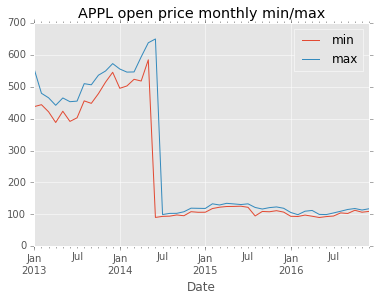

In [22]:
# Plot Monthly min/max/avg
sampler = valid_aapl_open.resample('M')
monthly_min_max = sampler.agg({'min': np.min, 'max': np.max})
monthly_min_max.plot(kind='line', title='APPL open price monthly min/max')

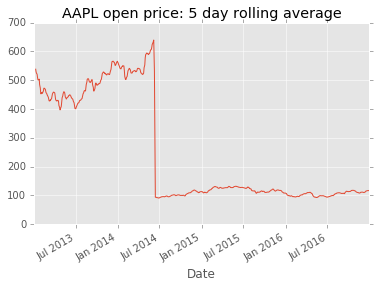

In [23]:
# Rolling statistics
rolling = valid_aapl_open.rolling(5)
five_day_mean = rolling.mean()
five_day_mean.plot(kind='line', title='AAPL open price: 5 day rolling average')

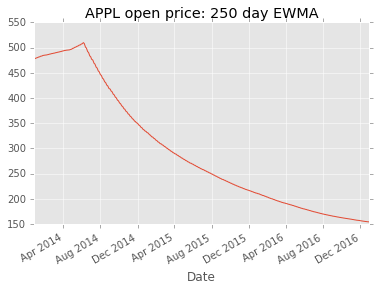

In [24]:
# EWM
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.ewm.html
# DataFrame.ewm(com=None, span=None, halflife=None, alpha=None, 
# min_periods=0, freq=None, adjust=True, ignore_na=False, axis=0)[source]
ewm = valid_aapl_open.ewm(halflife=250, min_periods=250)
smoothed_mean = ewm.mean()
smoothed_mean[smoothed_mean.first_valid_index():].plot(kind='line', title='APPL open price: 250 day EWMA')

In [25]:
## Construct daily returns and risk model
close_prices = {ticker: df['Close'] for ticker, df in daily_data.items()}
close_prices = pd.concat(close_prices, axis=1)

# Convert to businessdays and ffill the nans
close_prices = close_prices.asfreq('B').ffill(axis=0)

In [26]:
close_prices.head()

,AAPL,GOOGL,IBM,MSFT
Date,,,,
2013-01-02,549.029976,723.250034,196.350006,27.620001
2013-01-03,542.099991,723.670024,195.270004,27.250000
2013-01-04,526.999992,737.969980,193.990005,26.740000
2013-01-07,523.900002,734.749998,193.139999,26.690001
2013-01-08,525.310020,733.300033,192.869995,26.549999


In [56]:
daily_changes = close_prices.diff(1).iloc[1:]
daily_changes.head()

,AAPL,GOOGL,IBM,MSFT
Date,,,,
2013-01-03,-6.929985,0.419990,-1.080002,-0.370001
2013-01-04,-15.099999,14.299956,-1.279999,-0.510000
2013-01-07,-3.099990,-3.219982,-0.850006,-0.049999
2013-01-08,1.410018,-1.449965,-0.270004,-0.140002
2013-01-09,-8.210014,4.820004,-0.549988,0.150002


In [62]:
daily_changes.tail()

,AAPL,GOOGL,IBM,MSFT
Date,,,,
2016-12-26,0.000000,0.000000,0.000000,0.000000
2016-12-27,0.740005,2.130005,0.429992,0.039997
2016-12-28,-0.500000,-5.359986,-0.949997,-0.289997
2016-12-29,-0.029999,-1.690002,0.410004,-0.090000
2016-12-30,-0.910003,-10.429993,-0.610001,-0.760003


In [59]:
daily_returns = daily_changes / close_prices.values[:-1]

In [63]:
daily_returns.head()

,AAPL,GOOGL,IBM,MSFT
Date,,,,
2013-01-03,-0.012622,0.000581,-0.005500,-0.013396
2013-01-04,-0.027855,0.019760,-0.006555,-0.018716
2013-01-07,-0.005882,-0.004363,-0.004382,-0.001870
2013-01-08,0.002691,-0.001973,-0.001398,-0.005245
2013-01-09,-0.015629,0.006573,-0.002852,0.005650


In [64]:
daily_returns.tail()

,AAPL,GOOGL,IBM,MSFT
Date,,,,
2016-12-26,0.000000,0.000000,0.000000,0.000000
2016-12-27,0.006351,0.002637,0.002579,0.000632
2016-12-28,-0.004264,-0.006618,-0.005684,-0.004583
2016-12-29,-0.000257,-0.002101,0.002467,-0.001429
2016-12-30,-0.007796,-0.012991,-0.003661,-0.012083


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F6E90BF400>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001F6E8E5C208>], dtype=object)

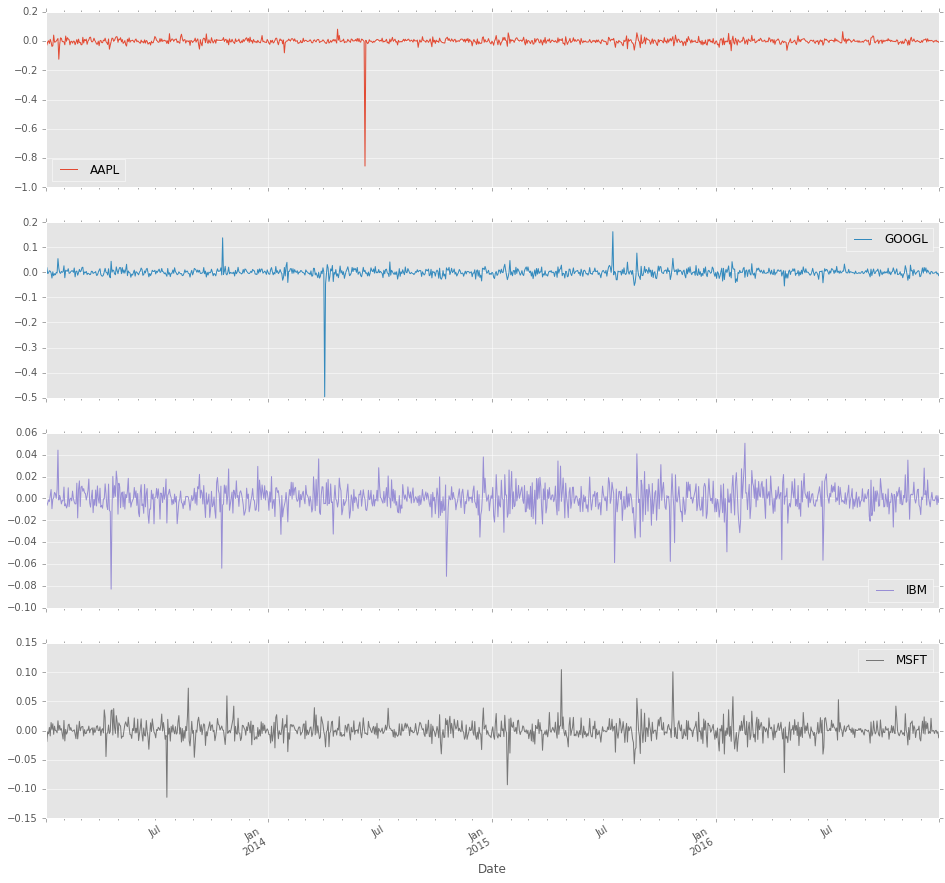

In [73]:
daily_returns.plot(kind='line', subplots=True, figsize=(16, 16))

In [67]:
smoother = daily_returns.ewm(halflife=20, min_periods=20)
smoothed_cov = smoother.cov()
smoothed_cov = smoothed_cov.iloc[20:]

for day in smoothed_cov.items[:5]:
    print(smoothed_cov[day])

           AAPL     GOOGL       IBM      MSFT
AAPL   0.001175 -0.000057  0.000093 -0.000015
GOOGL -0.000057  0.000238  0.000127  0.000038
IBM    0.000093  0.000127  0.000125  0.000055
MSFT  -0.000015  0.000038  0.000055  0.000084
           AAPL     GOOGL       IBM      MSFT
AAPL   0.001099 -0.000047  0.000089 -0.000010
GOOGL -0.000047  0.000258  0.000131  0.000062
IBM    0.000089  0.000131  0.000121  0.000060
MSFT  -0.000010  0.000062  0.000060  0.000097
           AAPL     GOOGL       IBM      MSFT
AAPL   0.001046 -0.000018  0.000093  0.000010
GOOGL -0.000018  0.000281  0.000137  0.000087
IBM    0.000093  0.000137  0.000118  0.000067
MSFT   0.000010  0.000087  0.000067  0.000112
               AAPL         GOOGL       IBM      MSFT
AAPL   1.095974e-03 -7.485096e-08  0.000069  0.000015
GOOGL -7.485096e-08  2.659691e-04  0.000126  0.000082
IBM    6.914459e-05  1.263228e-04  0.000114  0.000062
MSFT   1.539636e-05  8.204324e-05  0.000062  0.000106
               AAPL         GOOGL       